# Pre-trained Model Library

**XenonPy.MDL** is a library of pre-trained models that were obtained by feeding diverse materials data on structure-property relationships into neural networks and some other supervised learning models.

XenonPy offers a simple-to-use toolchain to perform **transfer learning** with the given **pre-trained models** seamlessly.
In this tutorial, we will focus on model querying and retrieving.

### useful functions

Running the following cell will load some commonly used packages, such as [NumPy](https://numpy.org/), [pandas](https://pandas.pydata.org/), and so on. It will also import some in-house functions used in this tutorial. See *'tools.ipynb'* file to check what will be imported.

In [1]:
%run tools.ipynb

### access pre-trained models with MDL class

We prepared a wide range of APIs to let you query and download our models.
These APIs can be accessed via any HTTP requests.
For convenience, we implemented some of the most popular APIs and wrapped them into XenonPy.
All these functions can be accessed using `xenonpy.mdl.MDL`.

In [2]:
# --- import necessary libraries

from xenonpy.mdl import MDL

In [3]:
# --- init and check

mdl = MDL()
mdl

mdl.version

MDL(api_key='anonymous.user.key', endpoint='http://xenon.ism.ac.jp/api')

'0.1.1'

Noticed that ``mdl`` contains optional parameters ``api_key`` and ``endpoint``.
``endpoint`` point to where data is fetched. ``api_key`` is an access token used to validate the authorization and action permissions.
At this moment, the default key, ``anonymous.user.key``, is the only valid option.
We will open the public registration system when the system is ready.

### querying

There are many ways to query models. The most straightforward method is to use `mdl`.
It accepts variable keywords as input and any hit keyword will be returned. For example, to query models that predict property **refractive index**:

In [4]:
# --- query data

query = mdl('refractive')
query

QueryModelDetails(api_key='anonymous.user.key', endpoint='http://xenon.ism.ac.jp/api', variables={'query': ('refractive',)})
Queryable: 
 id
 transferred
 succeed
 isRegression
 deprecated
 modelset
 method
 property
 descriptor
 lang
 accuracy
 precision
 recall
 f1
 sensitivity
 prevalence
 specificity
 ppv
 npv
 meanAbsError
 maxAbsError
 meanSquareError
 rootMeanSquareError
 r2
 pValue
 spearmanCorr
 pearsonCorr

You can see that run a querying method does not execute the querying immediately, but simply return a queryable object.
If you print out the object, the `queryable` list will be shown. Only the variables in the list can be fetched from the server.

Another way to get the `queryable` list is call `query.queryable` as below:

In [5]:
query.queryable

['id',
 'transferred',
 'succeed',
 'isRegression',
 'deprecated',
 'modelset',
 'method',
 'property',
 'descriptor',
 'lang',
 'accuracy',
 'precision',
 'recall',
 'f1',
 'sensitivity',
 'prevalence',
 'specificity',
 'ppv',
 'npv',
 'meanAbsError',
 'maxAbsError',
 'meanSquareError',
 'rootMeanSquareError',
 'r2',
 'pValue',
 'spearmanCorr',
 'pearsonCorr']

Let's say we only want to know the variables of `modelset`, `method`, `property`, `descriptor`, `meanAbsError`, `meanSquareError`, `pValue`, and `pearsonCorr`. Execute the query as follow:

In [6]:
query(
    'modelset',
    'method',
    'property',
    'descriptor',
    'meanAbsError',  
    'meanSquareError',
    'pValue',
    'pearsonCorr' 
)

,modelset,method,property,descriptor,meanAbsError,meanSquareError,pValue,pearsonCorr,id
0,Stable inorganic compounds in materials project,pytorch.nn.neural_network,inorganic.crystal.refractive_index,xenonpy.compositions,0.422960,0.418109,None,0.631021,2335
1,Stable inorganic compounds in materials project,pytorch.nn.neural_network,inorganic.crystal.refractive_index,xenonpy.compositions,0.545381,1.641444,None,0.578646,2338
2,Stable inorganic compounds in materials project,pytorch.nn.neural_network,inorganic.crystal.refractive_index,xenonpy.compositions,0.708027,3.087893,None,0.439089,2339
3,Stable inorganic compounds in materials project,pytorch.nn.neural_network,inorganic.crystal.refractive_index,xenonpy.compositions,0.585778,2.238217,None,0.531137,2341
4,Stable inorganic compounds in materials project,pytorch.nn.neural_network,inorganic.crystal.refractive_index,xenonpy.compositions,0.542811,2.174997,None,0.558526,2342
...,...,...,...,...,...,...,...,...,...
3595,Polymer Genome Dataset,pytorch.nn.neural_network,organic.polymer.refractive_index,xenonpy.compositions,0.082331,0.019165,None,0.824684,31191
3596,Polymer Genome Dataset,pytorch.nn.neural_network,organic.polymer.refractive_index,xenonpy.compositions,0.094522,0.023909,None,0.667404,31192
3597,Polymer Genome Dataset,pytorch.nn.neural_network,organic.polymer.refractive_index,xenonpy.compositions,0.128509,0.039972,None,0.680136,31193
3598,Polymer Genome Dataset,pytorch.nn.neural_network,organic.polymer.refractive_index,xenonpy.compositions,0.096644,0.025381,None,0.704920,31194


If everything goes right, you will get a pandas DataFrame in return.
You can see that 3600 models matched the keyword and these models are contained in two sets of models.
Note that all variables in column `pValue` are `None`. This is not a querying error, all variables are `None` indeed, because they were not recorded during training.

You can also retrieve the last querying result from the query object via the `results` property.

In [7]:
query.results.head(3)

,modelset,method,property,descriptor,meanAbsError,meanSquareError,pValue,pearsonCorr,id
0,Stable inorganic compounds in materials project,pytorch.nn.neural_network,inorganic.crystal.refractive_index,xenonpy.compositions,0.422960,0.418109,None,0.631021,2335
1,Stable inorganic compounds in materials project,pytorch.nn.neural_network,inorganic.crystal.refractive_index,xenonpy.compositions,0.545381,1.641444,None,0.578646,2338
2,Stable inorganic compounds in materials project,pytorch.nn.neural_network,inorganic.crystal.refractive_index,xenonpy.compositions,0.708027,3.087893,None,0.439089,2339


Querying with `mdl` is simple but not efficient enough. In most cases, we may know exactly what we want.

Let's say we want to retrieve some models that were trained in the inorganic modelset and can predict the property of refractive index.
In this case, we need to feed the parameter `modelset_has` with **inorganic** and the `property_has` with **refractive**, respectively.

In [8]:
# --- query data

mdl(modelset_has='inorganic', property_has='refractive')()

,id,transferred,succeed,isRegression,deprecated,modelset,method,property,descriptor,lang,meanAbsError,maxAbsError,meanSquareError,rootMeanSquareError,r2,pValue,spearmanCorr,pearsonCorr
0,2335,False,True,True,False,Stable inorganic compounds in materials project,pytorch.nn.neural_network,inorganic.crystal.refractive_index,xenonpy.compositions,python,0.422960,1.782320,0.418109,0.646613,0.226642,None,0.805147,0.631021
1,2338,False,True,True,False,Stable inorganic compounds in materials project,pytorch.nn.neural_network,inorganic.crystal.refractive_index,xenonpy.compositions,python,0.545381,8.948927,1.641444,1.281188,0.330978,None,0.808188,0.578646
2,2339,False,True,True,False,Stable inorganic compounds in materials project,pytorch.nn.neural_network,inorganic.crystal.refractive_index,xenonpy.compositions,python,0.708027,10.142218,3.087893,1.757240,0.173911,None,0.839800,0.439089
3,2341,False,True,True,False,Stable inorganic compounds in materials project,pytorch.nn.neural_network,inorganic.crystal.refractive_index,xenonpy.compositions,python,0.585778,11.835847,2.238217,1.496067,0.241867,None,0.690957,0.531137
4,2342,False,True,True,False,Stable inorganic compounds in materials project,pytorch.nn.neural_network,inorganic.crystal.refractive_index,xenonpy.compositions,python,0.542811,11.045835,2.174997,1.474787,0.275737,None,0.886405,0.558526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,4863,False,True,True,False,All inorganic compounds in materials project,pytorch.nn.neural_network,inorganic.crystal.refractive_index,xenonpy.compositions,python,0.429642,2.204849,0.434043,0.658819,0.441885,None,0.808280,0.712245
2396,4865,False,True,True,False,All inorganic compounds in materials project,pytorch.nn.neural_network,inorganic.crystal.refractive_index,xenonpy.compositions,python,0.569579,7.622173,1.656191,1.286931,0.215002,None,0.829544,0.475225
2397,4867,False,True,True,False,All inorganic compounds in materials project,pytorch.nn.neural_network,inorganic.crystal.refractive_index,xenonpy.compositions,python,0.436152,2.635126,0.559099,0.747729,0.426260,None,0.834226,0.655400
2398,4868,False,True,True,False,All inorganic compounds in materials project,pytorch.nn.neural_network,inorganic.crystal.refractive_index,xenonpy.compositions,python,0.383506,2.473203,0.339653,0.582797,0.599966,None,0.840016,0.798442


You can see that only the models that belong to **All inorganic compounds in materials project** modelset were returned. If you call a query object without parameters, all queryable variables will be returned.

### list/get_detail variables

You can check some meta info of the database. To do so, we use `mdl.list_*` and `mdl.get_*_detail` methods. For example, `mdl.list_properties` will return:

In [9]:
mdl.list_properties()()

,name,fullName,symbol,unit,describe
0,inorganic.crystal.efermi,,,,
1,inorganic.crystal.refractive_index,,,,
2,inorganic.crystal.band_gap,,,,
3,inorganic.crystal.density,,,,
4,inorganic.crystal.total_magnetization,,,,
5,inorganic.crystal.dielectric_const_elec,,,,
6,inorganic.crystal.dielectric_const_total,,,,
7,inorganic.crystal.final_energy_per_atom,,,,
8,inorganic.crystal.formation_energy_per_atom,,,,
9,inorganic.crystal.volume,,,,


and `mdl.get_property_detail` will return the property information including how many models are relevant to this property:

In [10]:
mdl.get_property_detail('inorganic.crystal.efermi')()

{'name': 'inorganic.crystal.efermi',
 'fullName': '',
 'symbol': '',
 'unit': '',
 'describe': '',
 'count': 2481}

These querying statements are very useful when you want to know what is in the database.

### get training info/env and download url by model ID

Note that all models have their unique IDs. We can use model ID to get more information about a particular model. The following shows how to get training info/env by model ID.

,total_iters,i_epoch,i_batch,train_mse_loss,val_mae,val_mse,val_rmse,val_r2,val_pearsonr,val_spearmanr,val_p_value,val_max_ae
694,694,22,23,2.060905,1.098812,2.106717,1.451453,0.701376,0.850455,0.847006,0.0,12.112278
695,695,22,24,2.049812,1.162004,2.331702,1.526991,0.669485,0.844444,0.839916,0.0,12.192457
696,696,22,25,2.156136,1.092442,2.166551,1.471921,0.692895,0.837554,0.828305,0.0,12.244514


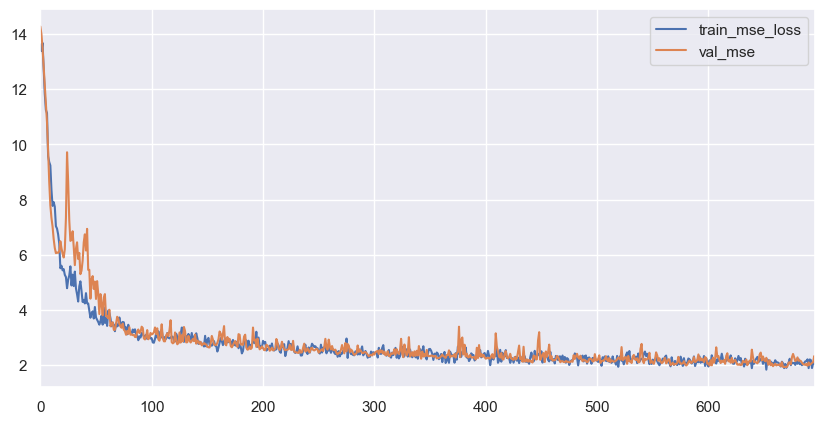

In [11]:
info = mdl.get_training_info(model_id=1234)()
_, ax = plt.subplots(figsize=(10, 5), dpi=100)
info.tail(3)
info.plot(y=['train_mse_loss', 'val_mse'], ax=ax)

In [12]:
mdl.get_training_env(model_id=1234)()

{'python': '3.7.4 (default, Aug 13 2019, 20:35:49) \n[GCC 7.3.0]',
 'system': '#60-Ubuntu SMP Tue Jul 2 18:22:20 UTC 2019',
 'numpy': '1.16.4',
 'torch': '1.1.0',
 'xenonpy': '0.4.0.beta4',
 'device': 'cuda:2',
 'start': '2019/09/17 20:55:56',
 'finish': '2019/09/17 21:03:04',
 'time_elapsed': '5 days, 15:33:23.552799',
 'author': 'Chang Liu',
 'email': 'liu.chang@ism.ac.jp',
 'dataset': 'materials project'}

Getting download url can be done in a similar way.

In [13]:
mdl.get_model_urls(1234, 5678)()

,id,etag,url
0,1234,9274418b5ee2026ea8714b7edc7d012e-1,http://xenon.ism.ac.jp/mdl/inorganic.crystal.e...
1,5678,c5a962fce76a773b208cc59631999a25-1,http://xenon.ism.ac.jp/mdl/inorganic.crystal.b...


The output dataframe contains the column named `url`. If you only want to get the string of `url`, just use `queryable` specification.

In [14]:
mdl.get_model_urls(1234, 5678)('url')

,url
0,http://xenon.ism.ac.jp/mdl/inorganic.crystal.e...
1,http://xenon.ism.ac.jp/mdl/inorganic.crystal.b...


Also, if you don't want to get a dataframe or you want to control the output type yourself, you can set `return_json` to `True`.

In [15]:
mdl.get_model_urls(1234, 5678)('url', return_json=True)

[{'url': 'http://xenon.ism.ac.jp/mdl/inorganic.crystal.efermi/xenonpy.compositions/pytorch.nn.neural_network/290-180-177-162-46-32-1-$WEnkZ6e3.tar.gz'},
 {'url': 'http://xenon.ism.ac.jp/mdl/inorganic.crystal.band_gap/xenonpy.compositions/pytorch.nn.neural_network/290-168-132-111-1-$Nbe3TKMYM.tar.gz'}]

You can use these urls to download models yourself, but we suggest you to use `mdl.pull`.

In [16]:
mdl.pull?

Signature:
mdl.pull(
    *model_ids: Union[int, pandas.core.series.Series, pandas.core.frame.DataFrame],
    save_to: str = '.',
) -> pandas.core.frame.DataFrame
Docstring:
Download model(s) from XenonPy.MDL server.

Parameters
----------
model_ids
    Model ids.
    It can be given by a dataframe.
    In this case, the column with name ``id`` will be used.
save_to
    Path to save models.

Returns
-------
File:      ~/projects/XenonPy/xenonpy/mdl/mdl.py
Type:      method


In [17]:
ret = mdl.pull(1234, 5678)
ret

100%|██████████| 2/2 [00:01<00:00,  1.49it/s]


,id,model
0,1234,/Users/liuchang/Google 云端硬盘/postdoctoral/tutor...
1,5678,/Users/liuchang/Google 云端硬盘/postdoctoral/tutor...


The column named `model` contains the local path of the downloaded models.

### upload model

Uploading models is not yet availiable until we open the public registration. If you try to upload models, you will get ***'operation needs a logged in user and the corresponded api_key'*** error.

In [18]:
mdl.upload_model(
    modelset_id=2, 
    describe=dict(
        property='test2',
        descriptor='test2',
        method='test',
        lang='test',
        deprecated=True,
        isRegression=True,
        meanAbsError=1.11,
        pearsonCorr=0.85,
    ),
    training_info=dict(a=1, b=2),
    supplementary=dict(true=[1,2,3,4], pred=[1,2,2,4])
)(file='data')

ValueError: operation needs a logged in user and the corresponded api_key

### retrieve model

You can use `xenonpy.model.training.Checker` to load the downloaded models. For example, to load the model with id **1234**:

In [19]:
from xenonpy.model.training import Checker

In [20]:
checker = Checker(ret[ret.id == 1234].model.item())
checker

/usr/local/miniconda3/envs/xepy37/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `item` has been deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


<Checker> includes:
"final_state": /Users/liuchang/Google 云端硬盘/postdoctoral/tutorial/xenonpy_hands-on_20190925 2/inorganic.crystal.efermi/xenonpy.compositions/pytorch.nn.neural_network/290-180-177-162-46-32-1-$WEnkZ6e3/final_state.pth.s
"training_info": /Users/liuchang/Google 云端硬盘/postdoctoral/tutorial/xenonpy_hands-on_20190925 2/inorganic.crystal.efermi/xenonpy.compositions/pytorch.nn.neural_network/290-180-177-162-46-32-1-$WEnkZ6e3/training_info.pd.xz
"model_class": /Users/liuchang/Google 云端硬盘/postdoctoral/tutorial/xenonpy_hands-on_20190925 2/inorganic.crystal.efermi/xenonpy.compositions/pytorch.nn.neural_network/290-180-177-162-46-32-1-$WEnkZ6e3/model_class.pkl.z
"init_state": /Users/liuchang/Google 云端硬盘/postdoctoral/tutorial/xenonpy_hands-on_20190925 2/inorganic.crystal.efermi/xenonpy.compositions/pytorch.nn.neural_network/290-180-177-162-46-32-1-$WEnkZ6e3/init_state.pth.s
"model": /Users/liuchang/Google 云端硬盘/postdoctoral/tutorial/xenonpy_hands-on_20190925 2/inorganic.crystal.eferm

Note that the random string *$WEnkZ6e3* in the file name is a magic number to guarantee that each model has a unique name.

To load a model into python, call `checker.model` property.

In [21]:
checker.model

SequentialLinear(
  (layer_0): LinearLayer(
    (linear): Linear(in_features=290, out_features=180, bias=True)
    (dropout): Dropout(p=0.1)
    (normalizer): BatchNorm1d(180, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (layer_1): LinearLayer(
    (linear): Linear(in_features=180, out_features=177, bias=True)
    (dropout): Dropout(p=0.1)
    (normalizer): BatchNorm1d(177, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (layer_2): LinearLayer(
    (linear): Linear(in_features=177, out_features=162, bias=True)
    (dropout): Dropout(p=0.1)
    (normalizer): BatchNorm1d(162, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (layer_3): LinearLayer(
    (linear): Linear(in_features=162, out_features=46, bias=True)
    (dropout): Dropout(p=0.1)
    (normalizer): BatchNorm1d(46, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation):

Use `checker.checkpoints` to list checkpoints.

In [22]:
checker.checkpoints

<Checker> includes:
"mse_3": /Users/liuchang/Google 云端硬盘/postdoctoral/tutorial/xenonpy_hands-on_20190925 2/inorganic.crystal.efermi/xenonpy.compositions/pytorch.nn.neural_network/290-180-177-162-46-32-1-$WEnkZ6e3/checkpoints/mse_3.pth.s
"mse_1": /Users/liuchang/Google 云端硬盘/postdoctoral/tutorial/xenonpy_hands-on_20190925 2/inorganic.crystal.efermi/xenonpy.compositions/pytorch.nn.neural_network/290-180-177-162-46-32-1-$WEnkZ6e3/checkpoints/mse_1.pth.s
"mae_2": /Users/liuchang/Google 云端硬盘/postdoctoral/tutorial/xenonpy_hands-on_20190925 2/inorganic.crystal.efermi/xenonpy.compositions/pytorch.nn.neural_network/290-180-177-162-46-32-1-$WEnkZ6e3/checkpoints/mae_2.pth.s
"r2_5": /Users/liuchang/Google 云端硬盘/postdoctoral/tutorial/xenonpy_hands-on_20190925 2/inorganic.crystal.efermi/xenonpy.compositions/pytorch.nn.neural_network/290-180-177-162-46-32-1-$WEnkZ6e3/checkpoints/r2_5.pth.s
"mse_5": /Users/liuchang/Google 云端硬盘/postdoctoral/tutorial/xenonpy_hands-on_20190925 2/inorganic.crystal.efermi/xe

and `checker.checkpoints[<checkpoint name>]` to load information from a specific checkpoint.

In [23]:
checker.checkpoints['mse_3']

OrderedDict([('id', 'mse_3'),
             ('iterations', 670),
             ('model_state',
              OrderedDict([('layer_0.linear.weight',
                            tensor([[-2.7413,  2.2444, -0.6347,  ..., -0.4093,  1.7569,  0.3331],
                                    [-3.4710,  3.1230, -1.5549,  ...,  0.7105,  0.1097, -0.5686],
                                    [-1.0452, -0.0773, -1.8657,  ..., -2.4842, -2.4716,  0.0133],
                                    ...,
                                    [-2.8635,  2.0810, -1.8306,  ..., -0.7263,  0.1966,  0.6690],
                                    [-1.4911,  0.3969, -2.4763,  ..., -2.1228, -2.3481, -0.2280],
                                    [-4.5753,  3.2695, -3.0195,  ..., -1.5596, -0.2794,  0.9001]])),
                           ('layer_0.linear.bias',
                            tensor([ 1.8674e-01,  1.2594e+00,  6.3830e-03,  8.8717e-03, -2.2134e-02,
                                     1.0698e+00,  1.3682e-01, -6.5420e

### reuse model using trainer

`xenonpy.model.training.Trainer` can load model and checkpoints from checker or from model directory directly.

In [24]:
from xenonpy.model.training import Trainer

In [25]:
trainer = Trainer.load(from_=checker)
trainer

Trainer(clip_grad=None, cuda=None, epochs=200, loss_func=None,
        lr_scheduler=None,
        model=SequentialLinear(
  (layer_0): LinearLayer(
    (linear): Linear(in_features=290, out_features=180, bias=True)
    (dropout): Dropout(p=0.1)
    (normalizer): BatchNorm1d(180, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (layer_1): LinearLayer(
    (linear): Linear(...
    (normalizer): BatchNorm1d(46, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (layer_4): LinearLayer(
    (linear): Linear(in_features=46, out_features=32, bias=True)
    (dropout): Dropout(p=0.1)
    (normalizer): BatchNorm1d(32, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (output): Linear(in_features=32, out_features=1, bias=True)
),
        non_blocking=False, optimizer=None)

The following codes show how to reuse model for prediction.

In [26]:
# if you have not had the samples data
# preset.build('mp_samples', api_key=<your materials project api key>)
from xenonpy.datatools import preset

data = preset.mp_samples
data.head(3)

,band_gap,composition,density,e_above_hull,efermi,elements,final_energy_per_atom,formation_energy_per_atom,pretty_formula,structure,volume
mp-1008807,0.0000,"{'Rb': 1.0, 'Cu': 1.0, 'O': 1.0}",4.784634,0.996372,1.100617,"[Rb, Cu, O]",-3.302762,-0.186408,RbCuO,"[[-3.05935361 -3.05935361 -3.05935361] Rb, [0....",57.268924
mp-1009640,0.0000,"{'Pr': 1.0, 'N': 1.0}",8.145777,0.759393,5.213442,"[Pr, N]",-7.082624,-0.714336,PrN,"[[0. 0. 0.] Pr, [1.57925232 1.57925232 1.58276...",31.579717
mp-1016825,0.7745,"{'Hf': 1.0, 'Mg': 1.0, 'O': 3.0}",6.165888,0.589550,2.424570,"[Hf, Mg, O]",-7.911723,-3.060060,HfMgO3,"[[2.03622802 2.03622802 2.03622802] Hf, [0. 0....",67.541269


In [27]:
from xenonpy.descriptor import Compositions

prop = data['efermi'].dropna().to_frame()  # reshape to 2-D
desc = Compositions(featurizers='classic').transform(data.loc[prop.index]['composition'])

desc.head(3)
prop.head(3)

,ave:atomic_number,ave:atomic_radius,ave:atomic_radius_rahm,ave:atomic_volume,ave:atomic_weight,ave:boiling_point,ave:bulk_modulus,ave:c6_gb,ave:covalent_radius_cordero,ave:covalent_radius_pyykko,...,min:num_s_valence,min:period,min:specific_heat,min:thermal_conductivity,min:vdw_radius,min:vdw_radius_alvarez,min:vdw_radius_mm3,min:vdw_radius_uff,min:sound_velocity,min:Polarizability
mp-1008807,24.666667,174.067140,209.333333,25.666667,55.004267,1297.063333,72.868680,1646.90,139.333333,128.333333,...,1.0,2.0,0.360,0.02658,152.0,150.0,182.0,349.5,317.5,0.802
mp-1009640,33.000000,137.000000,232.500000,19.050000,77.457330,1931.200000,43.182441,1892.85,137.000000,123.500000,...,2.0,2.0,0.192,0.02583,155.0,166.0,193.0,360.6,333.6,1.100
mp-1016825,21.600000,153.120852,203.400000,13.920000,50.158400,1420.714000,76.663625,343.82,102.800000,96.000000,...,2.0,2.0,0.146,0.02658,152.0,150.0,182.0,302.1,317.5,0.802


,efermi
mp-1008807,1.100617
mp-1009640,5.213442
mp-1016825,2.424570


Missing directory and/or file name information!


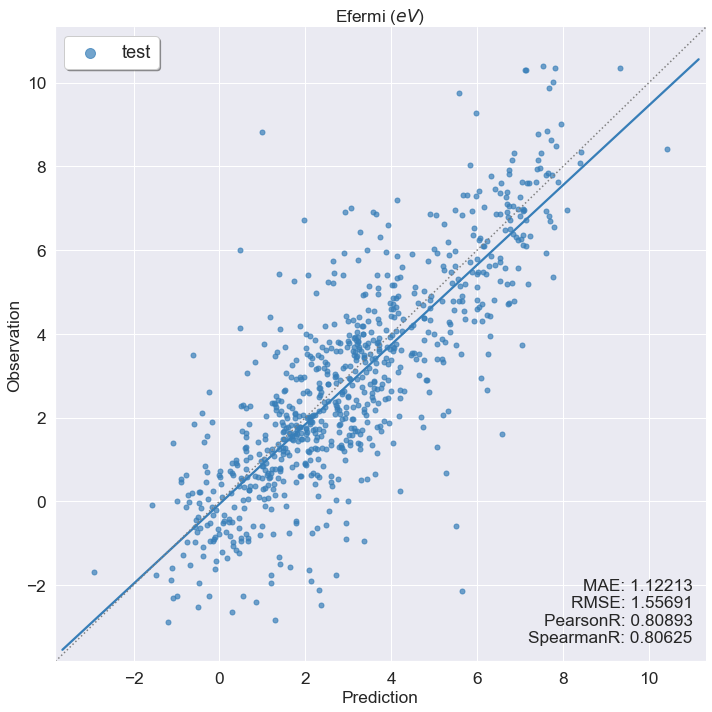

In [28]:
y_pred = trainer.predict(x_in=torch.tensor(desc.values, dtype=torch.float)).detach().numpy().flatten()
y_true = prop.values.flatten()

draw(y_true, y_pred, prop_name='Efermi ($eV$)')